C:\Users\Átila\AppData\Local\Temp\ipykernel_22776\350814346.py:42: DeprecationWarning: Using factorial() with floats is deprecated
  a3b=math.factorial((a3a))


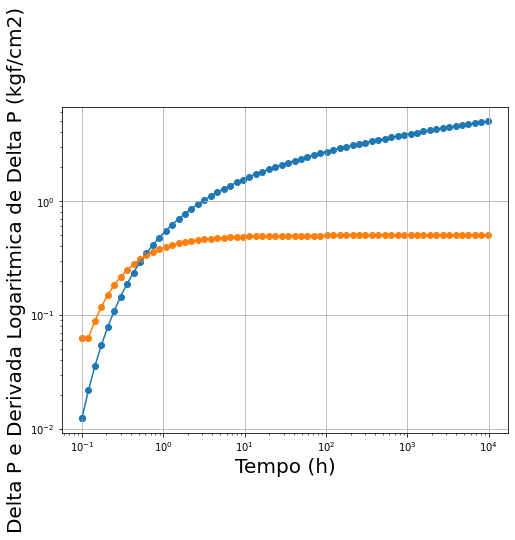

In [13]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from numpy import log as ln
import scipy.special as sc

tDi = 0.1
tDf = 10000

n = 1
tD = np.zeros(65)
pD = np.zeros(65)
tD[0] = tDi

while tDi <= tDf:
    pD[n]=CALCULA_PD(tDi)
    tD[n]=tDi
    tDi=tDi*1.2
    n=n+1

PDLinha = np.zeros(65)
for np in range(2, n-1):
    PDLinha[np]=DerivLog(tD[np-1],pD[np-1],tD[np],pD[np],tD[np+1],pD[np+1])

PDLinha[1]=PDLinha[2]
PDLinha[0]=PDLinha[1]
PDLinha[n-1]=PDLinha[n-2]
pD[0] = pD[1]

fig = plt.figure(figsize=(8,6))
plt.scatter(tD,pD)
plt.plot(tD,pD)
plt.scatter(tD,PDLinha)
plt.plot(tD,PDLinha)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tempo (h)", fontsize=20)
plt.ylabel("Delta P e Derivada Logaritmica de Delta P (kgf/cm2)", fontsize=20)
plt.show()

In [14]:
# ====================================================
def DerivLog(x1,y1,xc,yc,x2,y2):
    d1=((y2-yc)/ln(x2/xc))*(ln(xc/x1)/ln(x2/x1))
    d2=((yc-y1)/ln(xc/x1))*(ln(x2/xc)/ln(x2/x1))
    return (d1+d2)

# ====================================================
#Solução da Linha-Fonte
# ====================================================
def FT_LINHAFONTE(u):
    return sc.kn(0,1*math.sqrt(u))/u;
    #return sc.kn(0,1*math.sqrt(u))/(u**(3/2)*sc.kn(1,math.sqrt(u)))

# ====================================================
def minimo(i1, i2):
# ====================================================
    if i1 < i2:
        return i1
    else:
        return i2

# ====================================================
def CALCULA_PD(td):
#Rotina para inversão numérica de uma função no espaço de Laplace pelo algoritimo de Stehfest
# ===================================================
    NP_STEHFEST=12;
    n=NP_STEHFEST;

    v = np.zeros(65)
    for i in range(1, n+1):
        somat = 0
        inis = math.floor((i + 1)/2)
        fins = minimo(i,math.floor(n/2))
        a0=(-1)**(i+(n/2))
    #   disp([i,inis,fins])

        for k in range(inis, fins+1):
            a1=k**(1+(n/2))
            a2a=2*k
            a2b=math.factorial((a2a))
            a3a=((n/2)-k)
            a3b=math.factorial((a3a))
            a4a=math.factorial(k)
            a4b=a4a**2
            a5a=i-k
            a5b=math.factorial((a5a))
            a6a=((2*k)-i)
            a6b=math.factorial((a6a))
            somat=somat+(((a1*a2b)/(a3b*a4b*a5b*a6b)))
        v[i] = a0 * somat
    st = 0
    for m in range(1, NP_STEHFEST+1):
        u = m * ln(2.0) / td
    #=================================    
    # AQUI ENTRA A FUNÇÃO QUE EU QUERO    
    #================================
        st = st + v[m] * FT_LINHAFONTE(u)
    return ln(2.0) * st / td

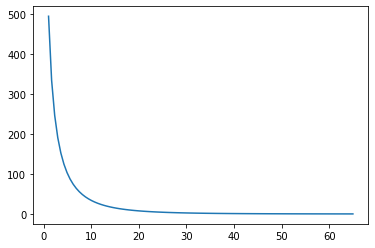

In [16]:
#exemplo 2.13

import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

NP_STEHFEST=12;
def alg(u):
    for m in range(1, NP_STEHFEST+1):
        for i in range(len(tD)):
            u = m * ln(2.0) / tD[i]
            A = np.array([[sc.kv(0,10000*math.sqrt(u)), sc.iv(0, 10000*math.sqrt(u))], [sc.kv(1,math.sqrt(u)), (-1)*sc.iv(1, math.sqrt(u))]])
            #print(A)
            B = np.array([0,1/(u**(3/2))]) 
            A_inversa = np.linalg.inv(A)
            X = np.dot(A_inversa,B)
            #print(X)
    return X

def Press(A, B, u):
    #print('A = ', A)
    #print('B = ', B)
    return A*sc.kv(0, 1*math.sqrt(u)) + B*sc.iv(0, 1*math.sqrt(u))

u = np.linspace(1,65, num = 100)
pressao = np.zeros(100)

for i in range(100):
    [A, B] = alg(u[i])
    pressao[i] = Press(A, B, u[i])
    
plt.plot(u, pressao)
plt.show()

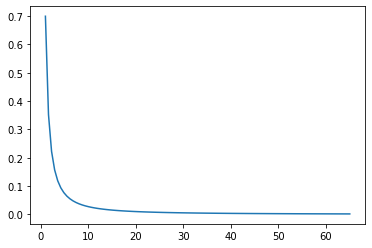

In [17]:
#exemplo 2.13

import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

def SolveAB(u):
    M = [[sc.kv(0,10000*math.sqrt(u)), sc.iv(0, 10000*math.sqrt(u))],
         [(-1)*sc.kv(1,math.sqrt(u)), sc.iv(1, math.sqrt(u))]]
    b = [0, -1/(u**(3/2))]
    Minv = np.linalg.inv(M)
    ab = np.dot(Minv,b)
    return ab

def Press(A, B, u):
    #print('A = ', A)
    #print('B = ', B)
    return A*sc.kv(0, 1*math.sqrt(u)) + B*sc.iv(0, 1*math.sqrt(u))

u = np.linspace(1,65, num = 100)
pressao = np.zeros(100)

for i in range(100):
    [A, B] = SolveAB(u[i])
    pressao[i] = Press(A, B, u[i])
    
plt.plot(u, pressao)
plt.show()

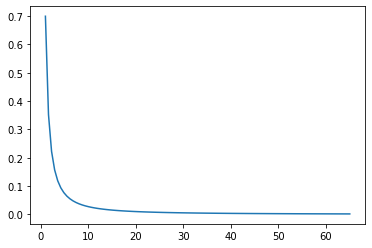

In [18]:
#exemplo 2.14

import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

def SolveAB1(u):
    M1 = [[sc.kv(0,100*math.sqrt(u)), sc.iv(0, 100*math.sqrt(u))],
         [sc.kv(1,math.sqrt(u)), (-1)*sc.iv(1, math.sqrt(u))]]
    b1 = [0, 1/(u**(3/2))]
    Minv1 = np.linalg.inv(M1)
    ab1 = np.dot(Minv1,b1)
    return ab1

def Press1(A1, B1, u):
    #print('A = ', A1)
    #print('B = ', B1)
    return A1*sc.kv(0, 1*math.sqrt(u)) + B1*sc.iv(0, 1*math.sqrt(u))

u = np.linspace(1,65, num = 100)
pressao1 = np.zeros(100)

for i in range(100):
    [A1, B1] = SolveAB1(u[i])
    pressao1[i] = Press1(A1, B1, u[i])
    
plt.plot(u, pressao)
plt.show()

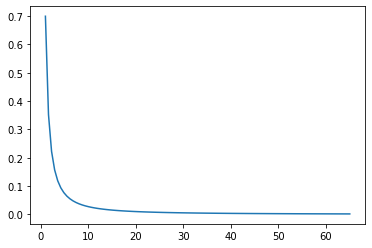

In [19]:
#exemplo 2.15

import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

def SolveAB(u):
    M = [[sc.kv(1,100*math.sqrt(u)), (-1)*sc.iv(1, 100*math.sqrt(u))],
         [sc.kv(1,math.sqrt(u)), (-1)*sc.iv(1, math.sqrt(u))]]
    b = [0, 1/(u**(3/2))]
    Minv = np.linalg.inv(M)
    ab = np.dot(Minv,b)
    return ab

def Press(A, B, u):
    #print('A = ', A)
    #print('B = ', B)
    return A*sc.kv(0, 1*math.sqrt(u)) + B*sc.iv(0, 1*math.sqrt(u))

u = np.linspace(1,65, num = 100)
pressao = np.zeros(100)

for i in range(100):
    [A, B] = SolveAB(u[i])
    pressao[i] = Press(A, B, u[i])
    
plt.plot(u, pressao)
plt.show()

In [6]:
#calculando teta

p = 0.25 #porosidade
v = 2.4 #viscosidade
ct = 2*10**(-4) #compressibilidade total
k1 = 400 #permeabilidade1
teta1 = (p*v*ct)/(k1)

In [7]:
teta1 

3e-07

In [8]:
k2 = 700 #permeabilidade2
teta2 = (p*v*ct)/(k2)

In [9]:
teta2

1.7142857142857143e-07

In [10]:
vaz = 200 #vazao
h = 10 #espessura porosa

In [11]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

r1 = 0.1

def prob(u):
    M = [[-0.1*math.sqrt(u*teta1)*sc.iv(1, 0.1*math.sqrt(u*teta1)), sc.kv(0, r1*math.sqrt(u*teta1)), -r1*math.sqrt(u*teta1)*sc.kv(1, r1*math.sqrt(u*teta1))],[0.1*math.sqrt(u*teta1)*sc.iv(1, 0.1*math.sqrt(u*teta1)), sc.iv(0, r1*math.sqrt(u*teta1)), r1*math.sqrt(u*teta1)*sc.iv(1, r1*math.sqrt(u*teta1))],[0, -sc.kv(0, r1*math.sqrt(u*teta2)), (k2/k1)*r1*math.sqrt(u*teta2)*sc.kv(1, r1*math.sqrt(u*teta2))]]
    b = [(-vaz*v)/(2*math.pi*k1*h*u), 0, 0]
    invM = np.linalg.inv(M)
    X = np.dot(invM, b)
    return X

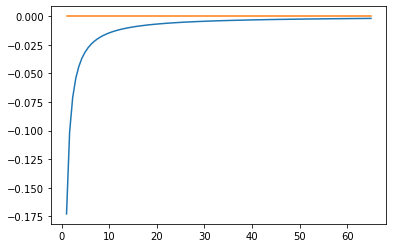

In [23]:
def Press(A1, B1, A2, B2, u):
    #print('A1 = ', A)
    #print('B1 = ', B)
    #print('C1 = ', C)
    Regiao1 = A1*sc.kv(0, 1*math.sqrt(u*teta1)) + B1*sc.iv(0, 1*math.sqrt(u*teta1))
    Regiao2 = A2*sc.kv(0, 1*math.sqrt(u*teta2)) + B2*sc.iv(0, 1*math.sqrt(u*teta2))
    return  Regiao1, Regiao2


u = np.linspace(1,65, num = 100)
pressao = np.zeros([2,100])

for i in range(100):
    [A1, B1, A2] = prob(u[i])
    B2 = 0
    [pressao[0,i],pressao[0,i]] = Press(A1, B1, A2, B2, u[i])
    
plt.plot(u, pressao[0])
plt.plot(u, pressao[1])
plt.show()